## Qualitative Dependent Variable Models

### Introduction.
- The dataset under analysis has 8 features namely: Pregnancies, Glucose, BloodPressure, SkinThickness,	Insulin, BMI, DiabetesPedigreeFunction and Age.

- Outcome, will be our target varible we hope to accurately predict.

- The aim of this analysis is identify which features are most key in resulting to diabetes then use the results to create proper recommendations on how to properly prevent it.

In [1]:
#Importing important libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as smf
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
#Loading the dataset
dataset=pd.read_csv("494827932_diabetes_5528470734573968.csv")
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
dataset.info()
# we have a total of 768 enties
# All features are in int and float format.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
# No missing values found
X=dataset.iloc[:,:-1] #A total of 8 features
y=dataset['Outcome'] 
X.shape , y.shape

((768, 8), (768,))

### Data Analysis

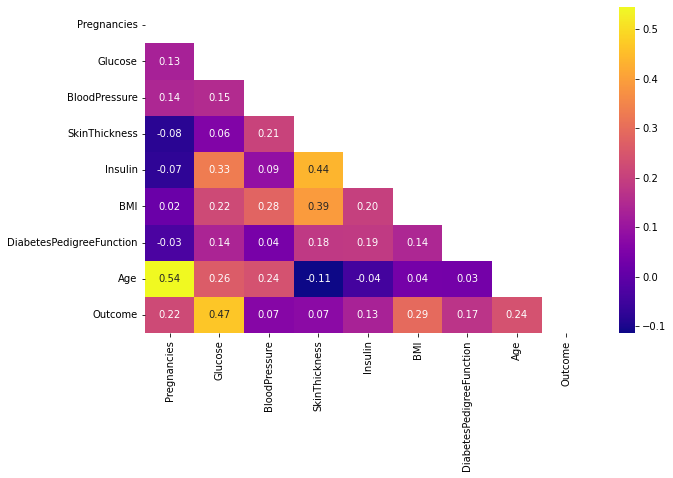

In [6]:
# Heat map showing correlation between available features and outcome.
fig, ax_s = plt.subplots(figsize=(10,6), ncols=1, nrows=1)
colormap = sns.diverging_palette(220, 10, as_cmap = True)
dropvals = np.zeros_like(dataset.corr())
dropvals[np.triu_indices_from(dropvals)] = True 
sns.heatmap(dataset.corr() ,cmap='plasma',ax=ax_s,annot = True, fmt = ".2f", mask = dropvals)
plt.show()

- From the above correlation plot, we see that all features have a positive correlation with outcome, with the highst correlation being 0.47(between glucose and outcome) and the lowest being 0.065(between bloodPressure and output). 
- Most features are positively correlated with some having a negative correlation. The highest positive correlation was 0.54(between age and pregnancies) while the lowest positive correlation was 0.03(between age and DiabetesPedigreeFunction). The highest negative correlation was -0.11(between skin thickness and age) and the lowest was -0.03(between DiabetesPedigreeFunction and pregnancies).

In [7]:
# Displaying the five-number summary: ie the maximum and minimum values, the lower and upper quartiles and the median.
def the_five_summary(df):
    cols = df.columns.values.tolist()
    summary={}
    for i in range(len(cols)):
        summary[cols[i]]={
                    "Min val":min(df[cols[i]]),
                    "Max val":max((df[cols[i]])),
                    "Mean":round(np.mean(df[cols[i]]),2),
                    "Median":np.median(df[cols[i]]),
                    "Upper Quartile":np.quantile(df[cols[i]], 0.75),
                    "Lower Quartile":np.quantile(df[cols[i]], 0.25)
                   }
    return summary

the_5_summary = the_five_summary(X)
for key,val in the_5_summary.items():
    print(f"Summary for {key}:=> {val}\n")

Summary for Pregnancies:=> {'Min val': 0, 'Max val': 17, 'Mean': 3.85, 'Median': 3.0, 'Upper Quartile': 6.0, 'Lower Quartile': 1.0}

Summary for Glucose:=> {'Min val': 0, 'Max val': 199, 'Mean': 120.89, 'Median': 117.0, 'Upper Quartile': 140.25, 'Lower Quartile': 99.0}

Summary for BloodPressure:=> {'Min val': 0, 'Max val': 122, 'Mean': 69.11, 'Median': 72.0, 'Upper Quartile': 80.0, 'Lower Quartile': 62.0}

Summary for SkinThickness:=> {'Min val': 0, 'Max val': 99, 'Mean': 20.54, 'Median': 23.0, 'Upper Quartile': 32.0, 'Lower Quartile': 0.0}

Summary for Insulin:=> {'Min val': 0, 'Max val': 846, 'Mean': 79.8, 'Median': 30.5, 'Upper Quartile': 127.25, 'Lower Quartile': 0.0}

Summary for BMI:=> {'Min val': 0.0, 'Max val': 67.1, 'Mean': 31.99, 'Median': 32.0, 'Upper Quartile': 36.6, 'Lower Quartile': 27.3}

Summary for DiabetesPedigreeFunction:=> {'Min val': 0.078, 'Max val': 2.42, 'Mean': 0.47, 'Median': 0.3725, 'Upper Quartile': 0.62625, 'Lower Quartile': 0.24375}

Summary for Age:=> {'

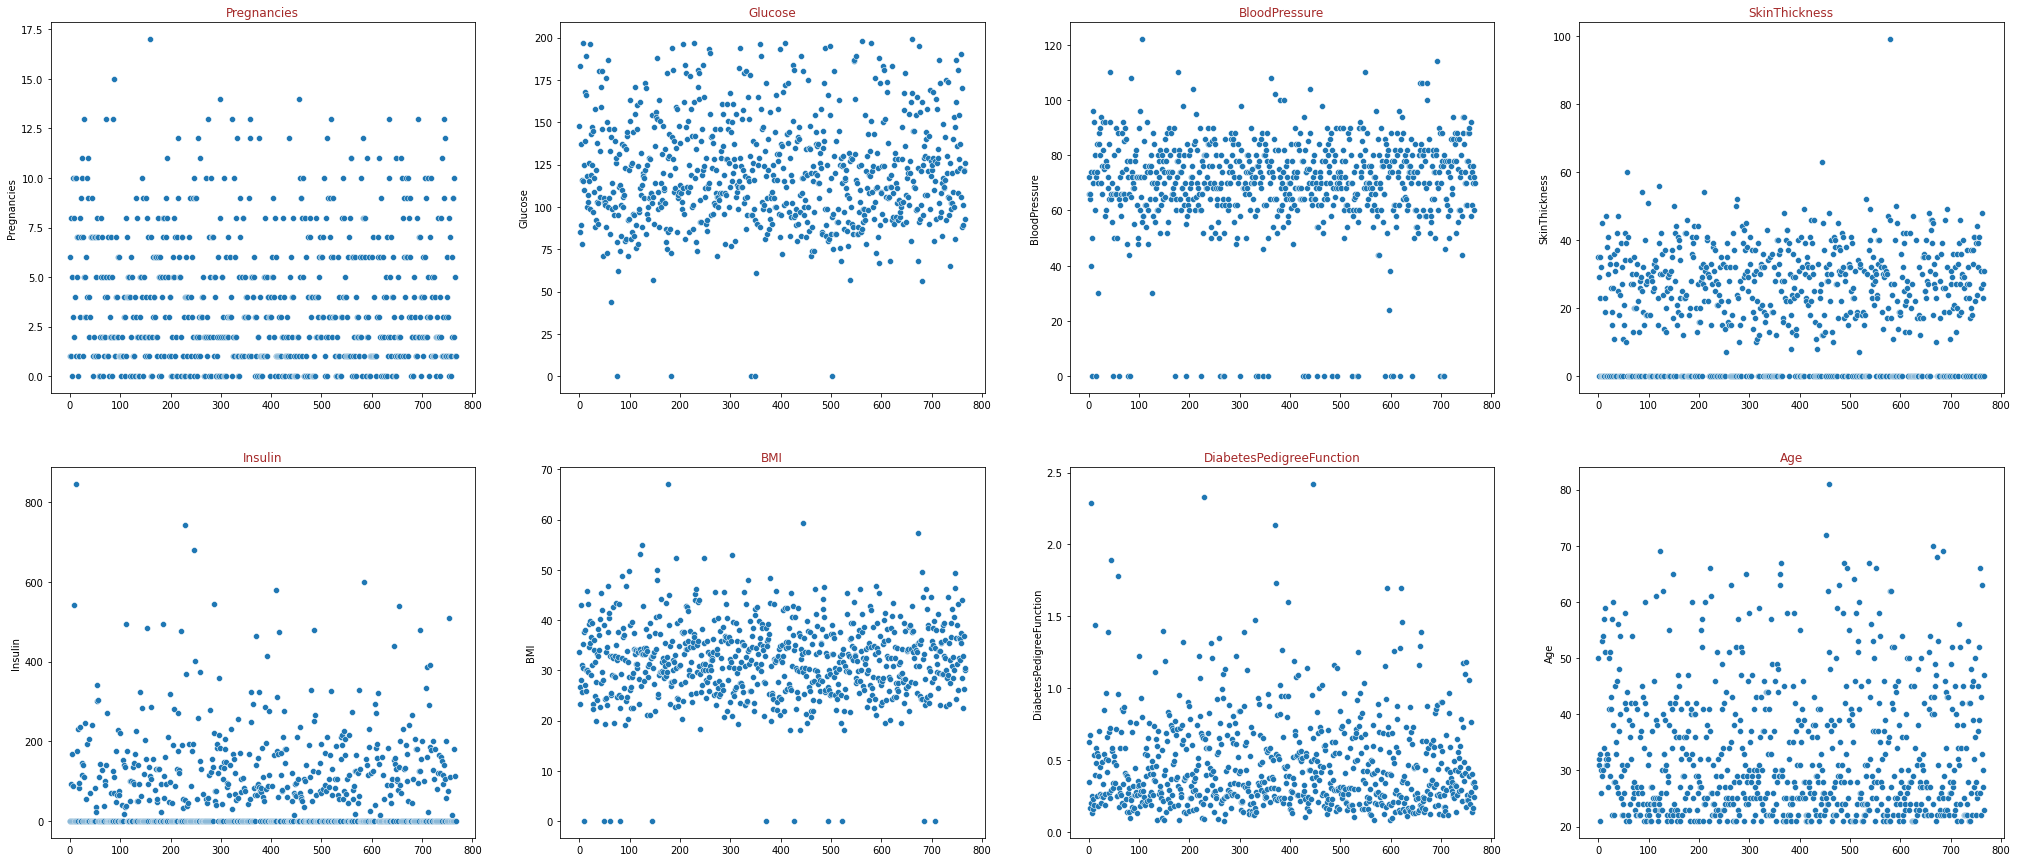

In [8]:
# analyzing data distribution using Scatterplots.
def scatterplt_maker(df, cols):
    fig, ax = plt.subplots(figsize=(35, 15),ncols=4, nrows=2)
    ax = ax.flatten()
    for i in range(len(cols)):
        sns.scatterplot(data=df[cols[i]],ax=ax[i])
        ax[i].set_title(cols[i], color="brown")
    plt.show()
cols = X.columns.values.tolist()
scatterplt_maker(X,cols)

The scatter plots above, reveal some presence of outliers.

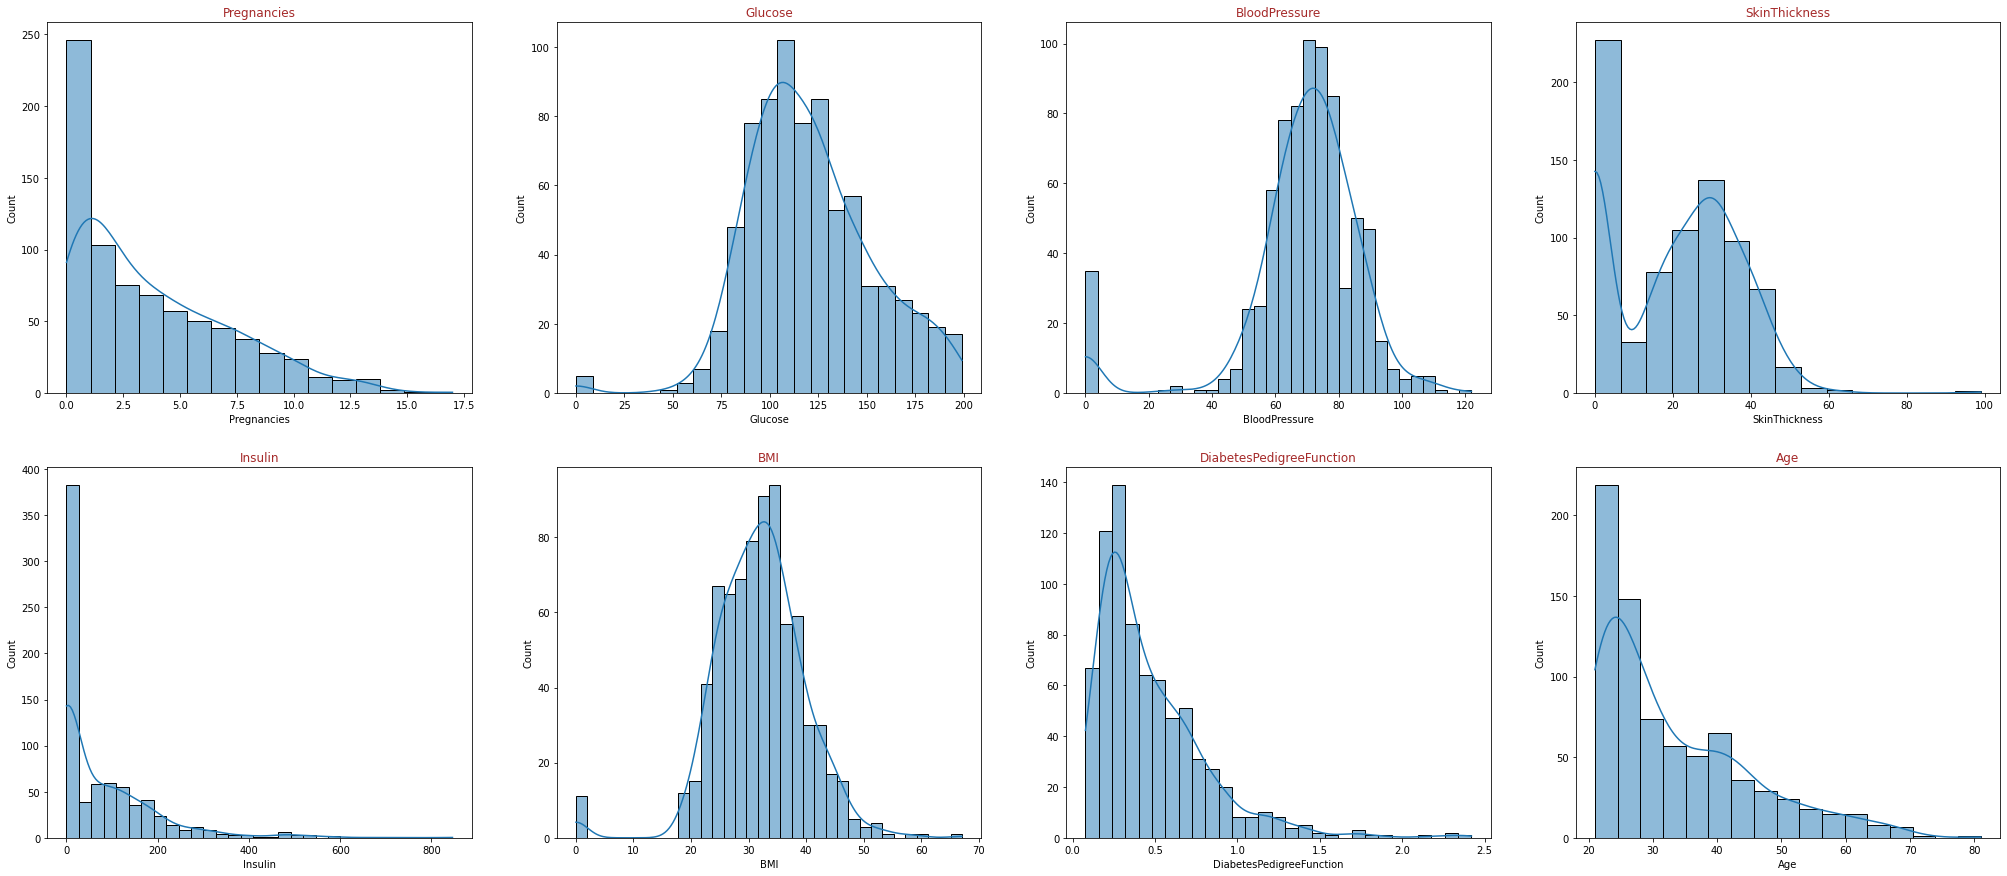

In [9]:
# analyzing data distribution using Histograms.
def histplt_maker(df, cols):
    fig, ax = plt.subplots(figsize=(35, 15),ncols=4, nrows=2)
    ax = ax.flatten()
    for i in range(len(cols)):
        sns.histplot(data=df[cols[i]], ax=ax[i],kde=True)
        ax[i].set_title(cols[i], color="brown")
    plt.show()
histplt_maker(X,cols)

- from the above plots the following can be concluded.
* Pregnancy, age, diabetespedigreefunction, insulin, skinThickness are positively skewed.
* BMI, BloodPressure, Glucose may be normaly distributed although some outliers are also present.

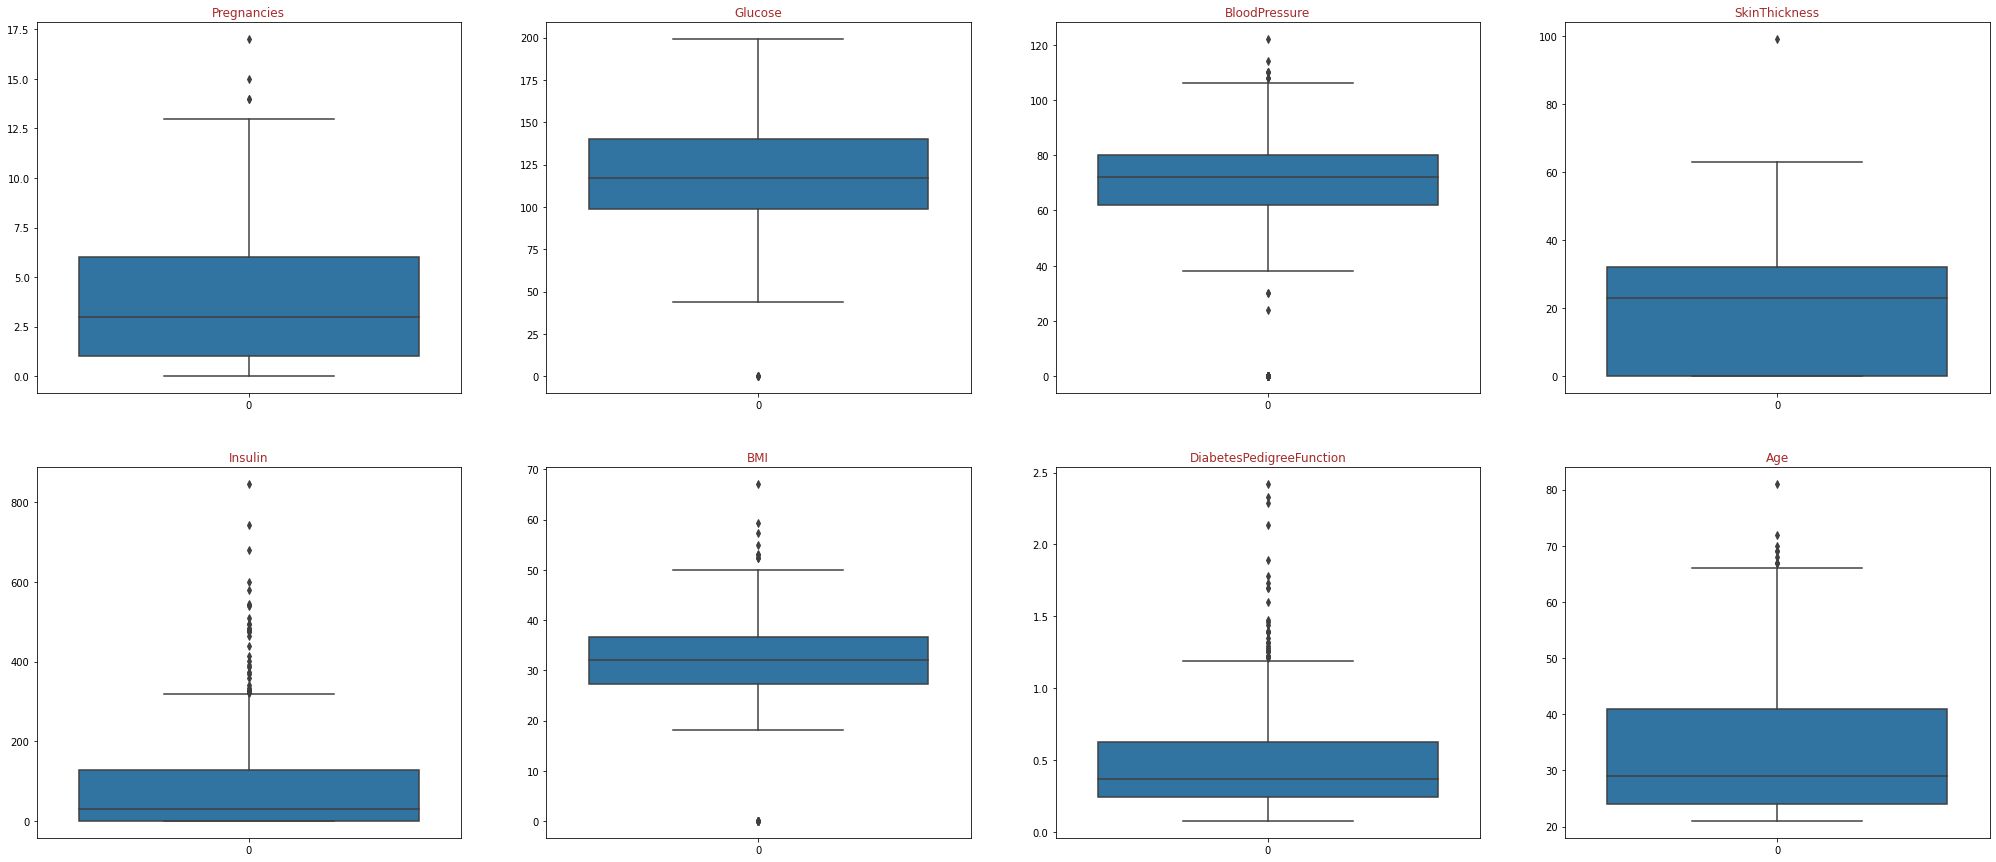

In [10]:
#analyzing data distribution using boxplots
def boxplt_maker(df, cols):
    fig, ax = plt.subplots(figsize=(35, 15),ncols=4, nrows=2)
    ax = ax.flatten()
    for i in range(len(cols)):
        sns.boxplot(data=df[cols[i]],ax=ax[i])
        ax[i].set_title(cols[i], color="brown")
    plt.show()
    
boxplt_maker(X,cols)

* The boxplots above confirm that our data has alot of outliers. The number of outliers are especially more on data that were positevely skewed. eg Insulin. This will be fixed in an attempt to increase model performance. 

<AxesSubplot:xlabel='Outcome', ylabel='count'>

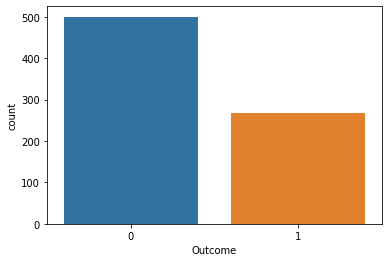

In [11]:
#analyzind output data 1 and 0 results using bar plot.
sns.countplot(x=y)

- Significantly more people tested negative than positive for diabetes. Therefore this data is not balanced.

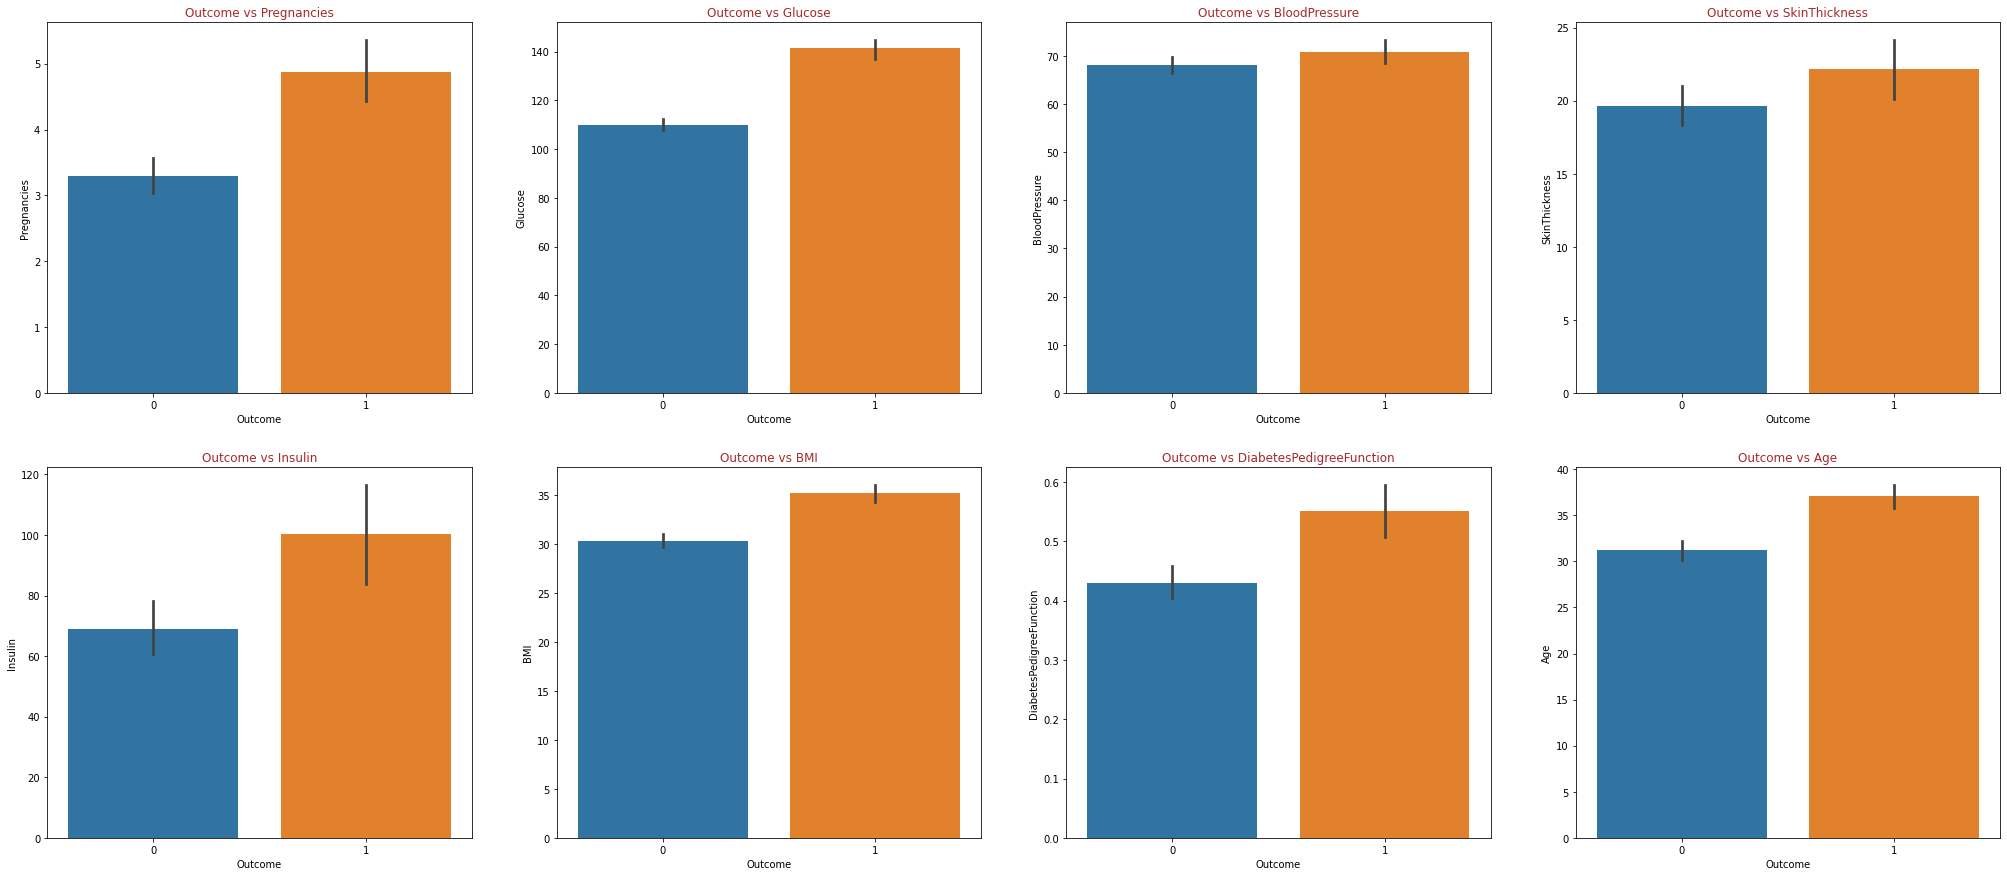

In [12]:
#analyzing relationship between features and output using bar plot.
def outcome_vs_features(data, cols):
    fig, ax = plt.subplots(figsize=(35, 15),ncols=4, nrows=2)
    ax = ax.flatten()
    for i in range(len(cols)):
        #ax[i].bar( y, X[cols[i]])
        sns.barplot(data=data, x="Outcome", y=cols[i], ax=ax[i])
        ax[i].set_title(f"Outcome vs {cols[i]}", color="brown")
    plt.show()
    
outcome_vs_features(dataset, cols)

- From the above plots the following can be denudated.
1. The mean pregnancy of those with diabetes is higher
2. The mean Glucose level of those with diabetes is higher
3. The BloodPressure of those with diabetes and those withoud is almost similar.
4. The mean Skin Thickness of those with diabetes is higher.
5. The mean Insulin level of those with diabetes is higher.
6. The mean BMI of those with diabetes is higher.
7. The mean diabetespedigreefunction of those with diabetes is higher.
8. The mean age of those with diabetes is higher.

In [13]:
model=LinearRegression().fit(X, y)

#Feature selection using Recursive Feature Elimination (RFE) 
cols = X.columns.values.tolist()
def feature_sel(model,x, y, n_f):
    rfe = RFE(model, n_features_to_select=n_f)
    rfe = rfe.fit(x,y)
    
    r_sup=rfe.support_
    r_ranks=rfe.ranking_
    opt_cols=[]
    for i in range(len(r_sup)):
        if r_sup[i]:
            opt_cols.append(cols[i])
    
    return opt_cols

In [14]:
#best 6 columns.
imp_cols = feature_sel(model,X, y, 6)

In [15]:
from sklearn.inspection import permutation_importance

#Selecting features using permutation importance for our data 
def perm_imp_scr(X, y, model, title = ""):
    result_test = permutation_importance(
        model, X, y, n_repeats=20, random_state=42, n_jobs=2
    )

    sorted_importances_idx = result_test.importances_mean.argsort()
    importances_test = pd.DataFrame(
        result_test.importances[sorted_importances_idx].T,
        columns=X.columns[sorted_importances_idx],
    )

    fig = plt.figure(figsize=(20, 15))
    axs = fig.subplots(ncols=1, nrows=1)

    importances_test.plot.box(vert=False, whis=10, ax = axs)
    axs.set_title(f"Permutation Importances {title}")
    axs.axvline(x=0, color="k", linestyle="--")
    axs.set_xlabel("increase in accuracy score")
    axs.figure.tight_layout()

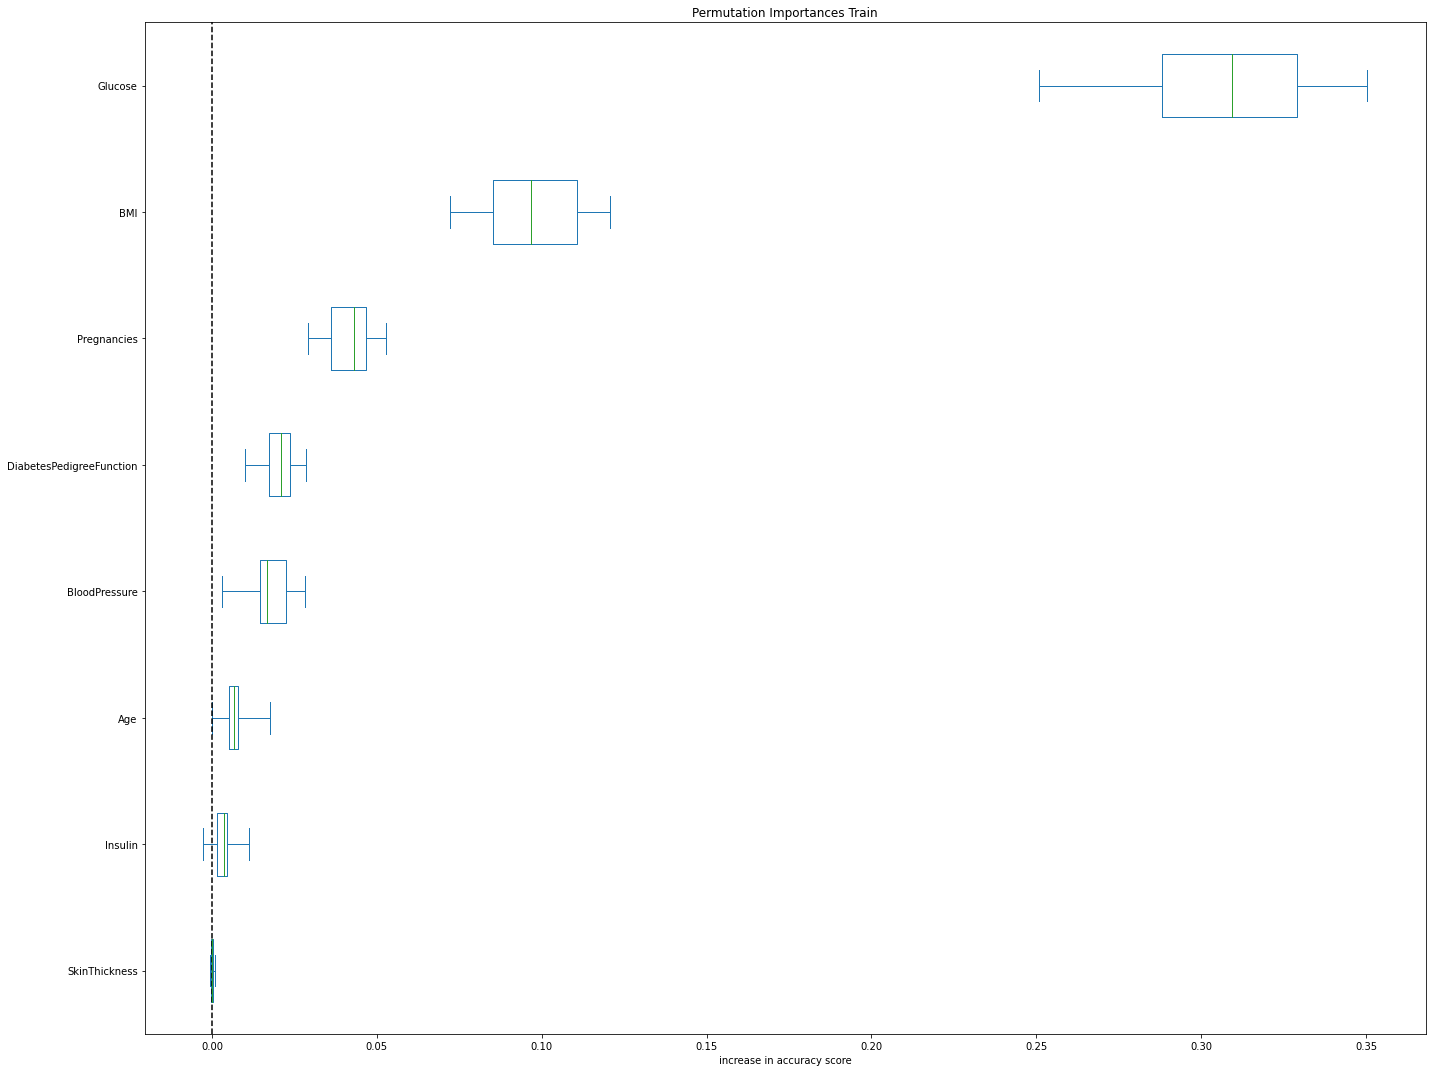

In [16]:
#X_train_fs, X_test_fs=select_features(LinearRegression(), X_train, y_train, X_test, 5)

perm_imp_scr(X, y, model, "Train")

* From the above feature selection the best 6 features are 'Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction' and 'Age'.

In [17]:
#spliting data into train and test data.
#standsrdizing X data.
scaler = StandardScaler()
X_st = scaler.fit(X).transform(X)
X_st_new = scaler.fit(X[imp_cols]).transform(X[imp_cols])
X_train, X_test, y_train, y_test = train_test_split(X_st, y, test_size=0.30, random_state=42,stratify=y)
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_st_new, y, test_size=0.30, random_state=42,stratify=y)

### Fitting models

In [18]:
#Initializing the three models with original features.
linear_model=LinearRegression()

In [19]:
#Function that  will be used to compare performance of the three models.

seed = 42
scoring = "neg_mean_squared_error"

def models_evaluation(trainX, trainy, models):
    results = []
    names   = []
    # 10-fold cross validation
    for name, model in models:
        kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
        cv_results = cross_val_score(model, trainX, trainy, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

    # boxplot algorithm comparison
    fig = plt.figure()
    fig.suptitle('Machine Learning algorithm comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

In [20]:
#function to train a model and get its performance(mae, mse). 
def ln_model_trainer_eval(x_test, y_test, fitted_model, model_coefs):
    model=fitted_model
    coef=model_coefs
    
    yhat_p=model.predict(x_test)
    yhat_v=np.zeros(len(yhat_p))
    
    for i in range(0,len(yhat_p)):
        if yhat_p[i] > 0.500:
            yhat_v[i] = 1.000
        else: 
            yhat_v[i] = 0.000
            
    yhat_v=yhat_v.astype('int64')        
    # evaluate predictions
    acc = accuracy_score(y_test, yhat_v)
    cf = confusion_matrix(y_test, yhat_v)
    
    return (acc, cf, yhat_v, yhat_p)

a.) Linear probability model

In [21]:
#fitting the model using original scaled train values
linear_model=linear_model.fit(X_train, y_train)
linear_model_coefs=linear_model.coef_
print(linear_model_coefs)

l_mte=ln_model_trainer_eval(X_test, y_test, linear_model, linear_model_coefs)

print('acc: %.2f\n' % (l_mte[0]))
print('cf: ', (l_mte[1]))

[ 0.07678676  0.20017759 -0.03289226 -0.00569052 -0.01332218  0.10740767
  0.03999837  0.0129382 ]
acc: 0.74

cf:  [[130  20]
 [ 40  41]]


* Got an accuracy of 74%. on the original data.
* The model manages a total of 129 + 41 correct prediction and 40+20 wrong prediction. 
* The model also go=ives one mislable.

In [22]:
#fitting the model using new scaled train values
linear_model_n = linear_model.fit(X_train_new, y_train_new)
print(linear_model_n.coef_)
l_mte_n=ln_model_trainer_eval(X_test_new, y_test_new, linear_model_n, linear_model_n.coef_)
print('acc: %.2f\n' % (l_mte_n[0]))
print('cf: ', (l_mte_n[1]))

[ 0.07756288  0.19582807 -0.03418808  0.10447495  0.03689209  0.01481502]
acc: 0.74

cf:  [[129  21]
 [ 40  41]]


* Got an accuracy of 74%. on the original data.
* The model manages a total of 129 + 41 correct prediction and 40+21 wrong prediction. 
* no increase in performance, therefore very little advantage in using less features.

In [23]:
from sklearn.metrics import classification_report

#Full classification report of the Linear model
print(classification_report(y_test, l_mte[2]))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       150
           1       0.67      0.51      0.58        81

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.69       231
weighted avg       0.73      0.74      0.73       231



* **Accuracy**: This model attained a descent accuracy of 74%.
* **precision**: when this model predicted that a person was diagnosedd with diabetes, this was true 67% of the time.
* **Recall**: This model was able to identify diabetes positive cases 51% of the time.
* **F1-Score**: The harmonic average score of this model on a class 1 (i.e., the positive diabetese diagnosis), which weights the precision and the recall together, is 58%.

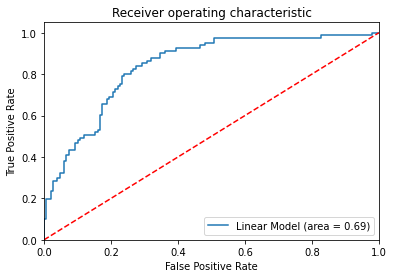

In [24]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

linear_roc_auc = roc_auc_score(y_test, l_mte[2])
fpr, tpr, thresholds = roc_curve(y_test, l_mte[3])

plt.figure()
plt.plot(fpr, tpr, label='Linear Model (area = %0.2f)' % linear_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Linear_ROC')
plt.show()

* The linear model attained a total area of 0.69.

b.) logic model

In [25]:
#initializing the model
logic_model=LogisticRegression()

In [26]:
#custom trainer for the logic model.
def log_model_trainer_eval(x_test, y_test, fitted_model, model_coefs):
    model = fitted_model
    coef = model_coefs
    
    yhat_p=x_test[:,0]*coef[0]+x_test[:,1]*coef[1]+x_test[:,2]*coef[2]+x_test[:,3]*coef[3]+x_test[:,4]*coef[4]+x_test[:,5]*coef[5]+x_test[:,6]*coef[6]+x_test[:,7]*coef[7]    
    yhat_v=np.zeros(len(yhat_p))
    
    for i in range(0,len(yhat_p)):
        if yhat_p[i] > 0.500:
            yhat_v[i] = 1.000
        else: 
            yhat_v[i] = 0.000
    yhat_v=yhat_v.astype('int64')
    # evaluate predictions
    acc = accuracy_score(y_test, yhat_v)
    cf = confusion_matrix(y_test, yhat_v)
    
    return (acc, cf, yhat_v, yhat_p)

In [27]:
#fitting the model using original scaled train values
logic_model=logic_model.fit(X_train, y_train)
print(logic_model.coef_)
log_mte=log_model_trainer_eval(X_test, y_test, logic_model,logic_model.coef_[0])

print('acc: %.2f\n' % (log_mte[0]))
print('cf: ', (log_mte[1]))

[[ 0.45870435  1.14626351 -0.20512143 -0.04066109 -0.07997874  0.71800921
   0.23166482  0.09604515]]
acc: 0.77

cf:  [[124  26]
 [ 28  53]]


* Got an accuracy of 74%. on the original data.
* The model manages a total of 130 + 42 correct prediction and 39+20 wrong prediction. 

* Got an accuracy of 73%. on the original data.
* The model manages a total of 128 + 41 correct prediction and 40+22 wrong prediction. 
* unfortunately the model performs worst with the new features.

In [28]:
from sklearn.metrics import classification_report

#Full classification report of the logit model report
print(classification_report(y_test, log_mte[2]))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       150
           1       0.67      0.65      0.66        81

    accuracy                           0.77       231
   macro avg       0.74      0.74      0.74       231
weighted avg       0.76      0.77      0.77       231



* **Accuracy**: This model attained a descent accuracy of 77%.
* **precision**: when this model predicted that a person was diagnosedd with diabetes, this was true 67% of the time.
* **Recall**: This model was able to identify diabetes positive cases 65% of the time.
* **F1-Score**: The harmonic average score of this model on a class 1 (i.e., the positive diabetese diagnosis), which weights the precision and the recall together, is 66%.

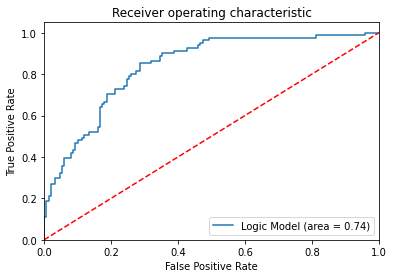

In [29]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logic_roc_auc = roc_auc_score(y_test, log_mte[2])
fpr, tpr, thresholds = roc_curve(y_test, log_mte[3])

plt.figure()
plt.plot(fpr, tpr, label='Logic Model (area = %0.2f)' % logic_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Logic_ROC')
plt.show()

* The logic model attained a total area of 0.74.

c.) Probic Model

In [30]:
probic_model=smf.Probit(y_train, X_train)

In [31]:
probic_model.fit().summary()

Optimization terminated successfully.
         Current function value: 0.536866
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  537
Model:                         Probit   Df Residuals:                      529
Method:                           MLE   Df Model:                            7
Date:                Sat, 18 Feb 2023   Pseudo R-squ.:                  0.1694
Time:                        16:28:08   Log-Likelihood:                -288.30
converged:                       True   LL-Null:                       -347.09
Covariance Type:            nonrobust   LLR p-value:                 2.443e-22
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2531      0.071      3.544      0.000       0.113       0.393
x2             0.6432      0.078      8.229      0.000       0.490       0.796
x3            -0.1085      0.067     -1.612      0.107      -0.240       0.023
x4            -0.0030      0.077     -0.039      0.969      -0.154       0.148
x5            -0.0536      0.081     -0.662      0.508      -0.212       0.105
x6             0.3461      0.073      4.729      0.000       0.203       0.490
x7             0.0935      0.061      1.521      0.128      -0.027       0.214
x8             0.0202      0.070      0.286      0.775      -0.118       0.158
==============================================================================
"""

In [32]:
import scipy.stats as si

#probic function
def normsdist(z):
    z = si.norm.cdf(z,0.0,1.0)
    return (z)

#custom model trainer for the probic model
def prob_model_trainer_eval(x_test, y_test, model_coefs):
    coef = model_coefs
    
    yhat_p=x_test[:,0]*coef[0]+x_test[:,1]*coef[1]+x_test[:,2]*coef[2]+x_test[:,3]*coef[3]+x_test[:,4]*coef[4]+x_test[:,5]*coef[5]+x_test[:,6]*coef[6]+x_test[:,7]*coef[7]
    
    yhat_p=normsdist(yhat_p)
    yhat_v=np.zeros(len(yhat_p))
    
    for i in range(0,len(yhat_p)):
        if yhat_p[i] > 0.500:
            yhat_v[i] = 1.000
        else: 
            yhat_v[i] = 0.000
            
    yhat_v=yhat_v.astype('int64')
    # evaluate predictions
    acc = accuracy_score(y_test, yhat_v)
    cf = confusion_matrix(y_test, yhat_v)
    
    return (acc, cf, yhat_v, yhat_p)

In [33]:
#fitting the model using original scaled train values
probic_model=smf.Probit(y_train, X_train)
probic_model=probic_model.fit()
print(probic_model.params)
prob_mte=prob_model_trainer_eval(X_test, y_test, probic_model.params)

print('acc: %.2f\n' % (prob_mte[0]))
print('cf: ', (prob_mte[1]))

Optimization terminated successfully.
         Current function value: 0.536866
         Iterations 5
x1    0.253131
x2    0.643150
x3   -0.108516
x4   -0.003039
x5   -0.053559
x6    0.346136
x7    0.093527
x8    0.020185
dtype: float64
acc: 0.77

cf:  [[111  39]
 [ 14  67]]


* Got an accuracy of 77%. on the original data.
* The model manages a total of 111 + 67 correct prediction and 14+39 wrong prediction.

In [34]:
from sklearn.metrics import classification_report

#Full classification report for the probic model.
print(classification_report(y_test, prob_mte[2]))

              precision    recall  f1-score   support

           0       0.89      0.74      0.81       150
           1       0.63      0.83      0.72        81

    accuracy                           0.77       231
   macro avg       0.76      0.78      0.76       231
weighted avg       0.80      0.77      0.78       231



* **Accuracy**: This model attained a descent accuracy of 77%.
* **precision**: when this model predicted that a person was diagnosedd with diabetes, this was true 63% of the time.
* **Recall**: This model was able to identify diabetes positive cases 83% of the time.
* **F1-Score**: The harmonic average score of this model on a class 1 (i.e., the positive diabetese diagnosis), which weights the precision and the recall together, is 72%.

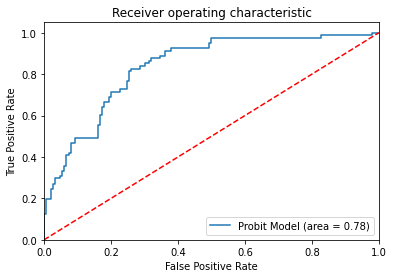

In [35]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#lets see how good the classifier is using the ROC curve:
#The receiver operating characteristic (ROC) 
probit_roc_auc = roc_auc_score(y_test, prob_mte[2])
fpr, tpr, thresholds = roc_curve(y_test, prob_mte[3])
plt.figure()
plt.plot(fpr, tpr, label='Probit Model (area = %0.2f)' % probit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Probit_ROC')
plt.show()

* The probic model attained a total area of 0.78.

### Model preffered

* from the above model analysis the probic model. is preffed as it had a decent accuracy, had the largest area (from ROC curve) and had a good recall of 83%

In [36]:
def make_pred(X,model_coefs):
    coef = model_coefs
    
    yhat_p=X[0]*coef[0]+X[1]*coef[1]+X[2]*coef[2]+X[3]*coef[3]+X[4]*coef[4]+X[5]*coef[5]+X[6]*coef[6]+X[7]*coef[7]
    
    yhat_p=normsdist(yhat_p)
    yhat_v = 0
    
    if yhat_p > 0.500:
        yhat_v = 1.000
    else: 
        yhat_v = 0.000
    yhat_v = int(yhat_v)
    return yhat_v

In [37]:
sample_data = X_test[110 : 114]
true_res = y_test[110 : 114]

In [38]:
print(f"1st prediction result: {make_pred(sample_data[0],probic_model.params)} vs real result: {true_res.iloc[0]}")
print(f"2nd prediction result is {make_pred(sample_data[1],probic_model.params)} vs real result: {true_res.iloc[1]}")
print(f"3rd prediction result is {make_pred(sample_data[2],probic_model.params)} vs real result: {true_res.iloc[2]}")
print(f"4th prediction result is {make_pred(sample_data[3],probic_model.params)} vs real result: {true_res.iloc[3]}")

1st prediction result: 0 vs real result: 1
2nd prediction result is 1 vs real result: 1
3rd prediction result is 1 vs real result: 1
4th prediction result is 1 vs real result: 1


* The model correctly predicted 3 out of four results correctly. 
* It is fairly reliable.